In [1]:
import numpy as np
import pandas as pd 
import xml.etree.ElementTree as ET
from collections import Counter
from collections import defaultdict

/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


The following is an exploration of fitness data. 

**By Isaac Fernandez**

## Reading XML data

In [2]:
def explore_xml_tags(file_path, max_tags=20):
    """
    Explore and count the unique tags in an XML file.
    
    Parameters:
    - file_path (str): Path to the XML file.
    - max_tags (int): Number of unique tags to display.
    
    Returns:
    - Counter: A counter object with the tag frequencies.
    """
    context = ET.iterparse(file_path, events=("start",))
    tag_counter = Counter()
    
    for event, elem in context:
        tag_counter[elem.tag] += 1
        elem.clear()  # Clear processed elements to save memory.
    
    # Display the most common tags.
    print(f"Top {max_tags} tags in the XML file:")
    for tag, count in tag_counter.most_common(max_tags):
        print(f"{tag}: {count}")
    
    return tag_counter

# Specify your file path
file_path = '/Users/isaacfernandez/Fitness/Fitness and more/apple_health_export/export.xml'

# Run the tag exploration
tags = explore_xml_tags(file_path)


Top 20 tags in the XML file:
Record: 2537328
MetadataEntry: 573650
InstantaneousBeatsPerMinute: 102808
WorkoutEvent: 5076
WorkoutStatistics: 4006
HeartRateVariabilityMetadataList: 2271
Workout: 923
ActivitySummary: 905
WorkoutRoute: 258
FileReference: 258
WorkoutActivity: 36
Correlation: 3
HealthData: 1
ExportDate: 1
Me: 1


In [3]:
def preview_tags(file_path, tags_to_preview, sample_size=5):
    """
    Preview samples of specified tags in an XML file.
    
    Parameters:
    - file_path (str): Path to the XML file.
    - tags_to_preview (list): List of tags to preview.
    - sample_size (int): Number of samples to extract for each tag.
    
    Returns:
    - dict: A dictionary with tag names as keys and sample data as values.
    """
    context = ET.iterparse(file_path, events=("start", "end"))
    samples = defaultdict(list)
    root = None

    for event, elem in context:
        if event == "start" and root is None:
            root = elem  # Store root element to clear memory later
        
        if event == "end" and elem.tag in tags_to_preview:
            # Extract attributes or text content as a sample
            samples[elem.tag].append(elem.attrib or elem.text)
            root.clear()  # Clear processed elements to save memory

            # Stop collecting samples once sample size is met
            if len(samples[elem.tag]) >= sample_size:
                continue
    
    # Convert to DataFrame for readability
    preview_dict = {}
    for tag, sample_data in samples.items():
        preview_dict[tag] = pd.DataFrame(sample_data).head(sample_size)
    
    return preview_dict

# Specify the file path and tags to preview
file_path = '/Users/isaacfernandez/Fitness/Fitness and more/apple_health_export/export.xml'
tags = [
    "Record", "MetadataEntry", "InstantaneousBeatsPerMinute", 
    "WorkoutEvent", "WorkoutStatistics", "HeartRateVariabilityMetadataList",
    "Workout", "ActivitySummary", "WorkoutRoute", "FileReference",
    "WorkoutActivity", "Correlation", "HealthData", "ExportDate"
]

# Preview the tags
previews = preview_tags(file_path, tags, sample_size=5)

# Print previews
for tag, df in previews.items():
    print(f"\nPreview of {tag}:")
    print(df)



Preview of ExportDate:
                       value
0  2024-11-12 16:20:29 -0600

Preview of Record:
                                   type      sourceName sourceVersion unit  \
0  HKQuantityTypeIdentifierDietaryWater           YAZIO          1166   mL   
1        HKQuantityTypeIdentifierHeight          Health        13.6.1   cm   
2        HKQuantityTypeIdentifierHeight          Health          13.3   cm   
3      HKQuantityTypeIdentifierBodyMass  Isaac’s iPhone        17.0.3   kg   
4      HKQuantityTypeIdentifierBodyMass          Health        13.6.1   kg   

                creationDate                  startDate  \
0  2021-11-09 16:05:51 -0600  2021-11-09 16:05:50 -0600   
1  2020-08-24 10:32:56 -0600  2020-08-24 10:32:56 -0600   
2  2020-01-06 23:49:43 -0600  2020-01-06 23:49:43 -0600   
3  2024-06-26 14:20:14 -0600  2024-06-26 14:20:14 -0600   
4  2020-08-24 10:32:56 -0600  2020-08-24 10:32:56 -0600   

                     endDate value device  
0  2021-11-09 16:05:50 -0600  

In [137]:
previews['WorkoutStatistics']

KeyError: 'WorkoutStatistics'

In [4]:
previews['Record']

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierDietaryWater,YAZIO,1166,mL,2021-11-09 16:05:51 -0600,2021-11-09 16:05:50 -0600,2021-11-09 16:05:50 -0600,500,NaN
1,HKQuantityTypeIdentifierHeight,Health,13.6.1,cm,2020-08-24 10:32:56 -0600,2020-08-24 10:32:56 -0600,2020-08-24 10:32:56 -0600,174,NaN
2,HKQuantityTypeIdentifierHeight,Health,13.3,cm,2020-01-06 23:49:43 -0600,2020-01-06 23:49:43 -0600,2020-01-06 23:49:43 -0600,173,NaN
3,HKQuantityTypeIdentifierBodyMass,Isaac’s iPhone,17.0.3,kg,2024-06-26 14:20:14 -0600,2024-06-26 14:20:14 -0600,2024-06-26 14:20:14 -0600,74,NaN
4,HKQuantityTypeIdentifierBodyMass,Health,13.6.1,kg,2020-08-24 10:32:56 -0600,2020-08-24 10:32:56 -0600,2020-08-24 10:32:56 -0600,71,NaN


In [5]:
previews['WorkoutEvent']

,type,date,duration,durationUnit
0,HKWorkoutEventTypePause,2021-11-08 21:39:25 -0600,NaN,NaN
1,HKWorkoutEventTypeResume,2021-11-08 21:51:27 -0600,NaN,NaN
2,HKWorkoutEventTypeMarker,2021-11-08 22:05:04 -0600,NaN,NaN
3,HKWorkoutEventTypePause,2021-11-09 21:29:10 -0600,NaN,NaN
4,HKWorkoutEventTypePause,2021-11-09 21:33:55 -0600,NaN,NaN


In [26]:
previews['WorkoutStatistics'].type.nunique()

2

In [13]:
previews['Workout']

,workoutActivityType,duration,durationUnit,sourceName,sourceVersion,device,creationDate,startDate,endDate
0,HKWorkoutActivityTypeHighIntensityIntervalTrai...,62.62225326697032,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-08 22:05:15 -0600,2021-11-08 20:50:34 -0600,2021-11-08 22:05:14 -0600
1,HKWorkoutActivityTypeTraditionalStrengthTraining,46.99470378359159,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:29:24 -0600,2021-11-09 20:42:11 -0600,2021-11-09 21:29:23 -0600
2,HKWorkoutActivityTypeKickboxing,4.529789982239405,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:33:59 -0600,2021-11-09 21:29:23 -0600,2021-11-09 21:33:58 -0600
3,HKWorkoutActivityTypeHighIntensityIntervalTrai...,18.82637984951337,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:52:48 -0600,2021-11-09 21:33:58 -0600,2021-11-09 21:52:48 -0600
4,HKWorkoutActivityTypeBoxing,3.499195098876953,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:59:34 -0600,2021-11-09 21:56:04 -0600,2021-11-09 21:59:34 -0600


In [8]:
previews['ActivitySummary']

,dateComponents,activeEnergyBurned,activeEnergyBurnedGoal,activeEnergyBurnedUnit,appleMoveTime,appleMoveTimeGoal,appleExerciseTime,appleExerciseTimeGoal,appleStandHours,appleStandHoursGoal
0,2021-11-07,0,0,kcal,0,0,0,30,0,12
1,2021-11-08,868.885,970,kcal,0,0,81,60,8,7
2,2021-11-09,877.799,970,kcal,0,0,89,60,15,7
3,2021-11-10,609.21,970,kcal,0,0,34,60,15,7
4,2021-11-11,497.75,970,kcal,0,0,15,60,16,7


## Workout Activity Type Analysis

In [27]:
previewsWorkout = preview_tags(file_path, "Workout", sample_size=100)

In [30]:
previews['Workout']

,workoutActivityType,duration,durationUnit,sourceName,sourceVersion,device,creationDate,startDate,endDate
0,HKWorkoutActivityTypeHighIntensityIntervalTrai...,62.62225326697032,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-08 22:05:15 -0600,2021-11-08 20:50:34 -0600,2021-11-08 22:05:14 -0600
1,HKWorkoutActivityTypeTraditionalStrengthTraining,46.99470378359159,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:29:24 -0600,2021-11-09 20:42:11 -0600,2021-11-09 21:29:23 -0600
2,HKWorkoutActivityTypeKickboxing,4.529789982239405,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:33:59 -0600,2021-11-09 21:29:23 -0600,2021-11-09 21:33:58 -0600
3,HKWorkoutActivityTypeHighIntensityIntervalTrai...,18.82637984951337,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:52:48 -0600,2021-11-09 21:33:58 -0600,2021-11-09 21:52:48 -0600
4,HKWorkoutActivityTypeBoxing,3.499195098876953,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:59:34 -0600,2021-11-09 21:56:04 -0600,2021-11-09 21:59:34 -0600
...,...,...,...,...,...,...,...,...,...
95,HKWorkoutActivityTypeTraditionalStrengthTraining,104.0426649173101,min,Isaac’s Apple Watch,8.4.1,"<<HKDevice: 0x300d6a580>, name:Apple Watch, ma...",2022-02-11 15:41:05 -0600,2022-02-11 13:57:01 -0600,2022-02-11 15:41:03 -0600
96,HKWorkoutActivityTypeWalking,79.02991813222567,min,Isaac’s Apple Watch,8.4.2,"<<HKDevice: 0x300cd9a40>, name:Apple Watch, ma...",2022-02-12 10:02:51 -0600,2022-02-12 08:43:47 -0600,2022-02-12 10:02:49 -0600
97,HKWorkoutActivityTypeTraditionalStrengthTraining,85.84218013286591,min,Isaac’s Apple Watch,8.4.2,"<<HKDevice: 0x300cd9a40>, name:Apple Watch, ma...",2022-02-15 12:32:22 -0600,2022-02-15 11:06:22 -0600,2022-02-15 12:32:21 -0600
98,HKWorkoutActivityTypeHighIntensityIntervalTrai...,12.7121527493,min,Isaac’s Apple Watch,8.4.2,"<<HKDevice: 0x300cd9a40>, name:Apple Watch, ma...",2022-02-15 12:45:07 -0600,2022-02-15 12:32:21 -0600,2022-02-15 12:45:06 -0600


In [ ]:
previewsWo

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
workoutData = previews['Workout']

In [21]:
workoutData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   workoutActivityType  5 non-null      object
 1   duration             5 non-null      object
 2   durationUnit         5 non-null      object
 3   sourceName           5 non-null      object
 4   sourceVersion        5 non-null      object
 5   device               5 non-null      object
 6   creationDate         5 non-null      object
 7   startDate            5 non-null      object
 8   endDate              5 non-null      object
dtypes: object(9)
memory usage: 488.0+ bytes


In [24]:
# Ensure `duration` is numeric
workoutData['duration'] = pd.to_numeric(workoutData['duration'], errors='coerce')

# Drop rows where `duration` could not be converted to numeric
workoutData = workoutData.dropna(subset=['duration'])


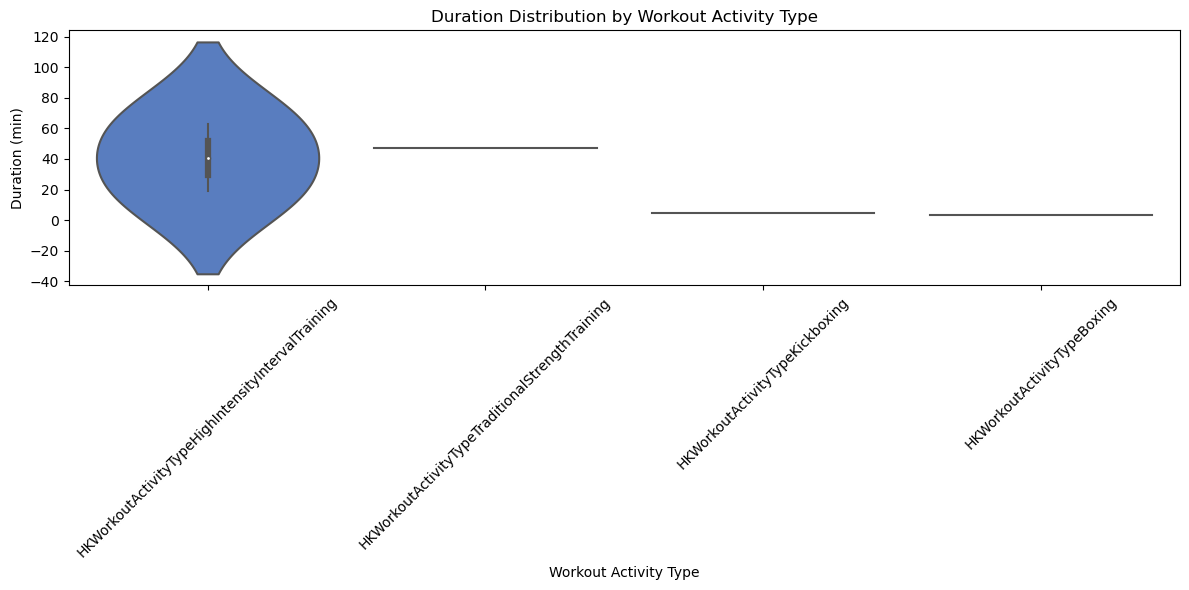

In [25]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=workoutData, x="workoutActivityType", y="duration", palette="muted")
plt.xticks(rotation=45)
plt.title("Duration Distribution by Workout Activity Type")
plt.xlabel("Workout Activity Type")
plt.ylabel("Duration (min)")
plt.tight_layout()
plt.show()


In [35]:
def extract_tags(file_path, tags_to_preview):
    """
    Preview samples of specified tags in an XML file.
    
    Parameters:
    - file_path (str): Path to the XML file.
    - tags_to_preview (list): List of tags to preview.
    - sample_size (int): Number of samples to extract for each tag.
    
    Returns:
    - dict: A dictionary with tag names as keys and sample data as values.
    """
    context = ET.iterparse(file_path, events=("start", "end"))
    samples = defaultdict(list)
    root = None

    for event, elem in context:
        if event == "start" and root is None:
            root = elem  # Store root element to clear memory later
        
        if event == "end" and elem.tag in tags_to_preview:
            # Extract attributes or text content as a sample
            samples[elem.tag].append(elem.attrib or elem.text)
            root.clear()  # Clear processed elements to save memory
    
    # Convert to DataFrame for readability
#     preview_dict = {}
#     for tag, sample_data in samples.items():
#         preview_dict[tag] = pd.DataFrame(sample_data).head(sample_size)
    
    return samples

In [36]:
extractionWorkout = extract_tags(file_path, "Workout")

In [86]:
type(extractionWorkout)

collections.defaultdict

In [39]:
extractDictWorkout = {}
for tag, sample_data in extractionWorkout.items():
    extractDictWorkout[tag] = pd.DataFrame(sample_data)

In [44]:
WorkOuts = extractDictWorkout['Workout']
WorkOuts

,workoutActivityType,duration,durationUnit,sourceName,sourceVersion,device,creationDate,startDate,endDate
0,HKWorkoutActivityTypeHighIntensityIntervalTrai...,62.62225326697032,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-08 22:05:15 -0600,2021-11-08 20:50:34 -0600,2021-11-08 22:05:14 -0600
1,HKWorkoutActivityTypeTraditionalStrengthTraining,46.99470378359159,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:29:24 -0600,2021-11-09 20:42:11 -0600,2021-11-09 21:29:23 -0600
2,HKWorkoutActivityTypeKickboxing,4.529789982239405,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:33:59 -0600,2021-11-09 21:29:23 -0600,2021-11-09 21:33:58 -0600
3,HKWorkoutActivityTypeHighIntensityIntervalTrai...,18.82637984951337,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:52:48 -0600,2021-11-09 21:33:58 -0600,2021-11-09 21:52:48 -0600
4,HKWorkoutActivityTypeBoxing,3.499195098876953,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:59:34 -0600,2021-11-09 21:56:04 -0600,2021-11-09 21:59:34 -0600
...,...,...,...,...,...,...,...,...,...
918,HKWorkoutActivityTypeTraditionalStrengthTraining,95.21623108386993,min,Isaac’s Apple Watch,10.6.1,"<<HKDevice: 0x300ca7570>, name:Apple Watch, ma...",2024-11-09 14:19:18 -0600,2024-11-09 12:43:53 -0600,2024-11-09 14:19:06 -0600
919,HKWorkoutActivityTypeBoxing,13.43324436744054,min,Isaac’s Apple Watch,10.6.1,"<<HKDevice: 0x300ca7570>, name:Apple Watch, ma...",2024-11-09 14:51:14 -0600,2024-11-09 14:37:36 -0600,2024-11-09 14:51:02 -0600
920,HKWorkoutActivityTypeRunning,79.5110192835331,min,Isaac’s Apple Watch,10.6.1,"<<HKDevice: 0x300ca7570>, name:Apple Watch, ma...",2024-11-10 09:54:03 -0600,2024-11-10 08:34:12 -0600,2024-11-10 09:53:42 -0600
921,HKWorkoutActivityTypeTraditionalStrengthTraining,56.53833621541659,min,Isaac’s Apple Watch,10.6.1,"<<HKDevice: 0x300ca7570>, name:Apple Watch, ma...",2024-11-11 21:32:07 -0600,2024-11-11 20:35:28 -0600,2024-11-11 21:32:01 -0600


In [49]:
len(WorkOuts.workoutActivityType.unique())
print(WorkOuts.workoutActivityType.unique())
print(WorkOuts.workoutActivityType.value_counts())

['HKWorkoutActivityTypeHighIntensityIntervalTraining'
 'HKWorkoutActivityTypeTraditionalStrengthTraining'
 'HKWorkoutActivityTypeKickboxing' 'HKWorkoutActivityTypeBoxing'
 'HKWorkoutActivityTypeWalking' 'HKWorkoutActivityTypeRunning'
 'HKWorkoutActivityTypeCycling' 'HKWorkoutActivityTypeRowing'
 'HKWorkoutActivityTypeJumpRope' 'HKWorkoutActivityTypeOther'
 'HKWorkoutActivityTypeFunctionalStrengthTraining'
 'HKWorkoutActivityTypeElliptical' 'HKWorkoutActivityTypeMartialArts'
 'HKWorkoutActivityTypeCooldown' 'HKWorkoutActivityTypeYoga'
 'HKWorkoutActivityTypeSwimming' 'HKWorkoutActivityTypeRacquetball']
workoutActivityType
HKWorkoutActivityTypeTraditionalStrengthTraining      299
HKWorkoutActivityTypeBoxing                           170
HKWorkoutActivityTypeRunning                          148
HKWorkoutActivityTypeWalking                          124
HKWorkoutActivityTypeSwimming                          56
HKWorkoutActivityTypeCycling                           40
HKWorkoutActivityTypeHi

Later prompts for myself. 
* Clean the names of the activity types.
* For each of the activity types, plot their duration distribution. 
* Get a timeline , using colors for the different activities.

In [110]:
Workouts2 =  WorkOuts.copy()

In [79]:
listW = ['HKWorkoutActivityTypeTraditionalStrengthTraining'
,'HKWorkoutActivityTypeBoxing'                           
,'HKWorkoutActivityTypeRunning'                          
,'HKWorkoutActivityTypeWalking'                         
,'HKWorkoutActivityTypeSwimming'                        
,'HKWorkoutActivityTypeCycling'                      
,'HKWorkoutActivityTypeHighIntensityIntervalTraining']

filtered = defaultdict(list)
for x in listW:
    y= Workouts2[Workouts2['workoutActivityType'] == x]
    filtered[x].append(y)

In [93]:
x = {}
for keys in filtered.keys():
    for value in filtered.values():
        x[keys] = value
        


In [80]:
type(filtered)

collections.defaultdict

/var/folders/mz/9cypvzdn37g8034zbwdlq4g80000gn/T/ipykernel_6328/1228031057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['duration'] = pd.to_numeric(activity['duration'], errors='coerce')


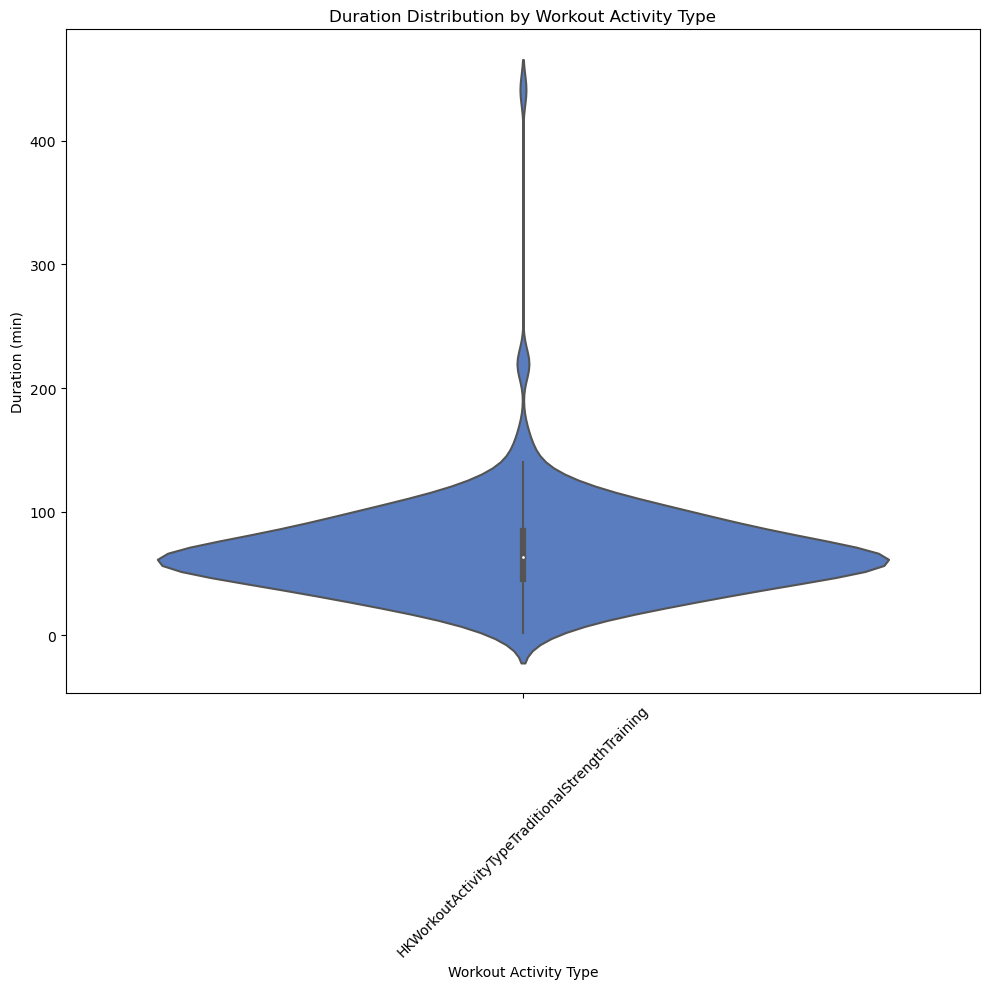

/var/folders/mz/9cypvzdn37g8034zbwdlq4g80000gn/T/ipykernel_6328/1228031057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['duration'] = pd.to_numeric(activity['duration'], errors='coerce')


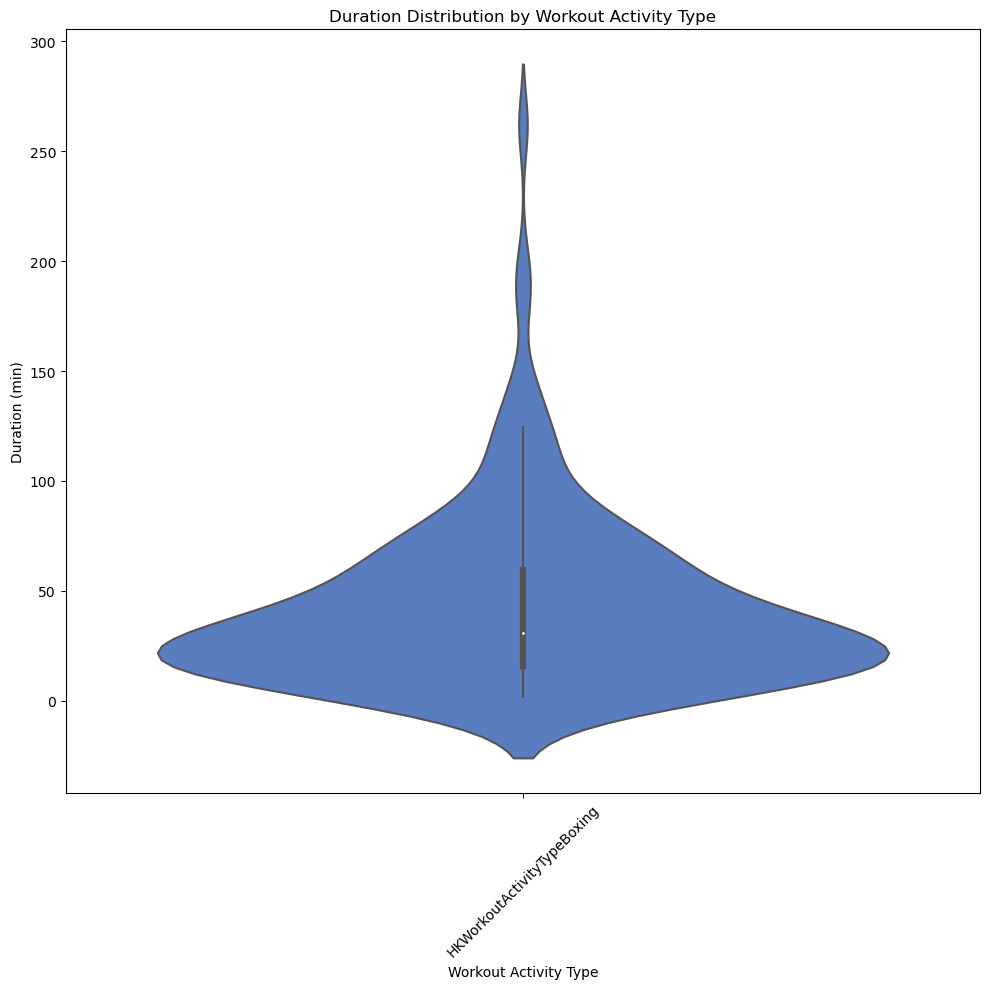

/var/folders/mz/9cypvzdn37g8034zbwdlq4g80000gn/T/ipykernel_6328/1228031057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['duration'] = pd.to_numeric(activity['duration'], errors='coerce')


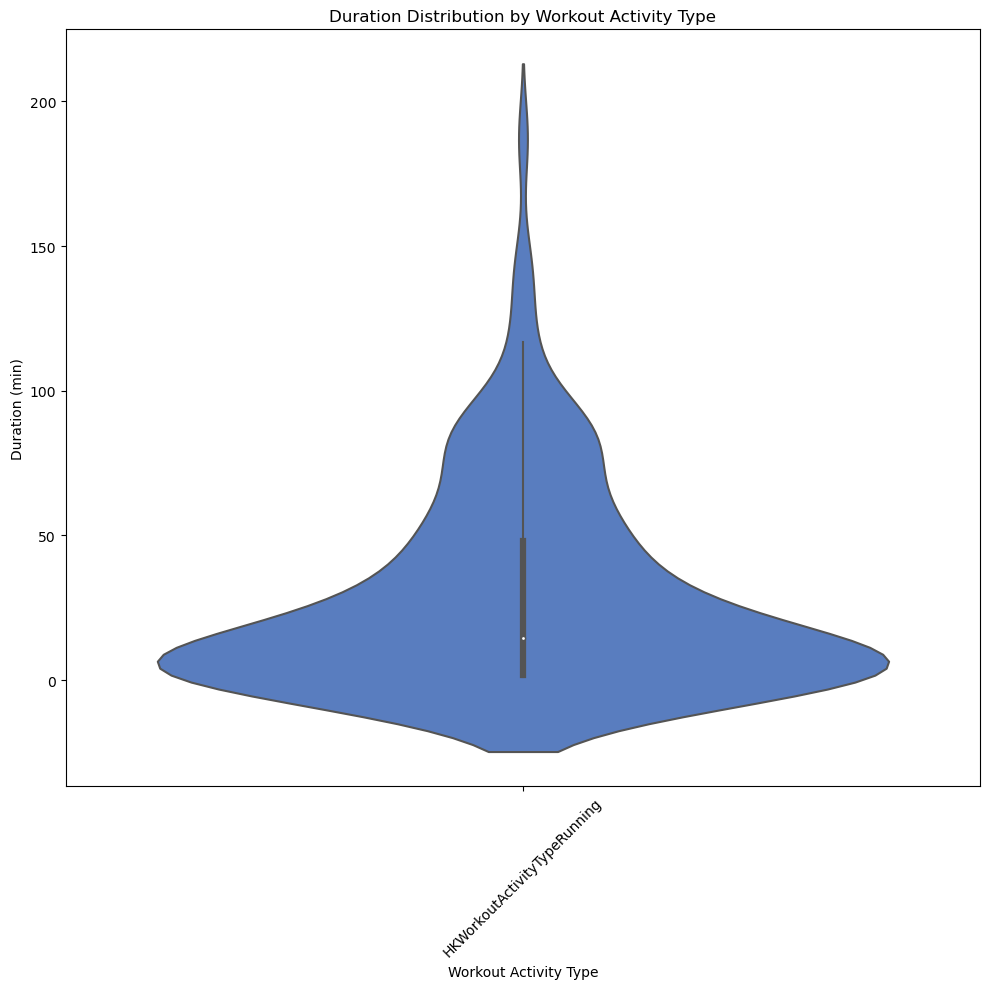

/var/folders/mz/9cypvzdn37g8034zbwdlq4g80000gn/T/ipykernel_6328/1228031057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['duration'] = pd.to_numeric(activity['duration'], errors='coerce')


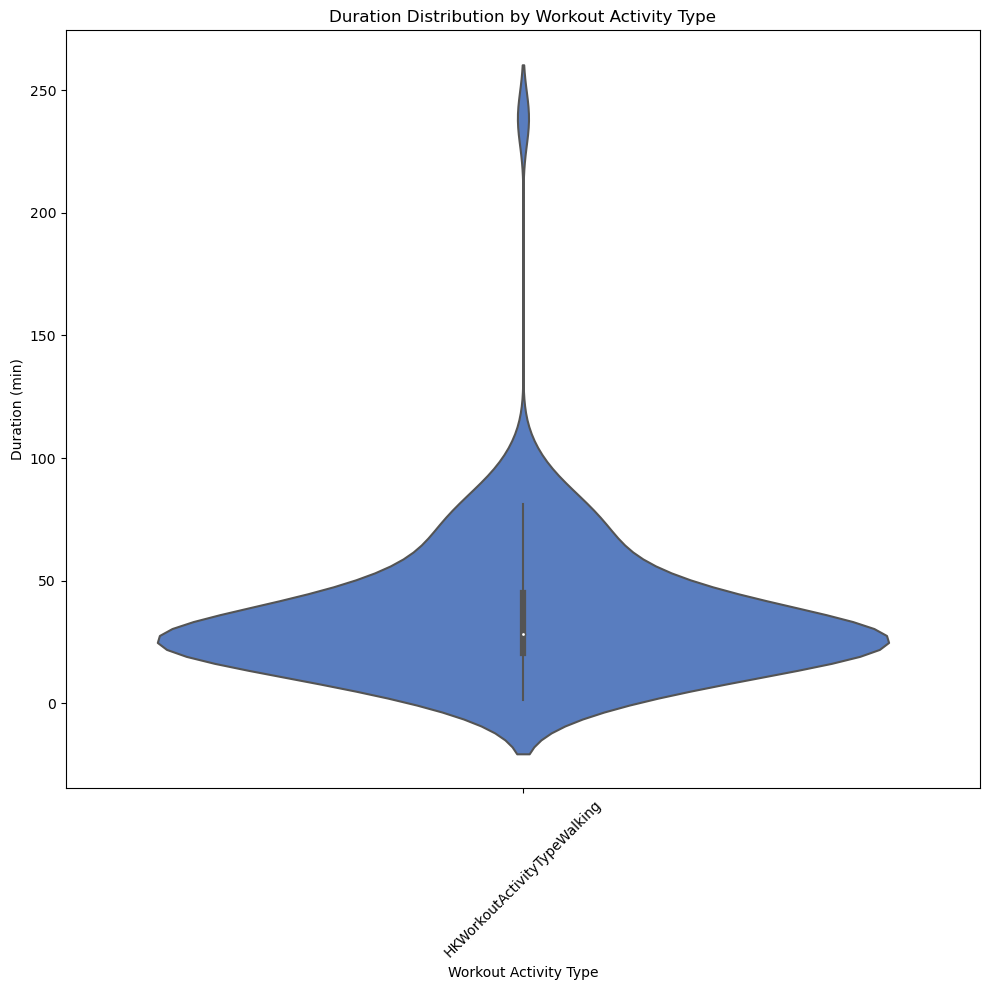

/var/folders/mz/9cypvzdn37g8034zbwdlq4g80000gn/T/ipykernel_6328/1228031057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['duration'] = pd.to_numeric(activity['duration'], errors='coerce')


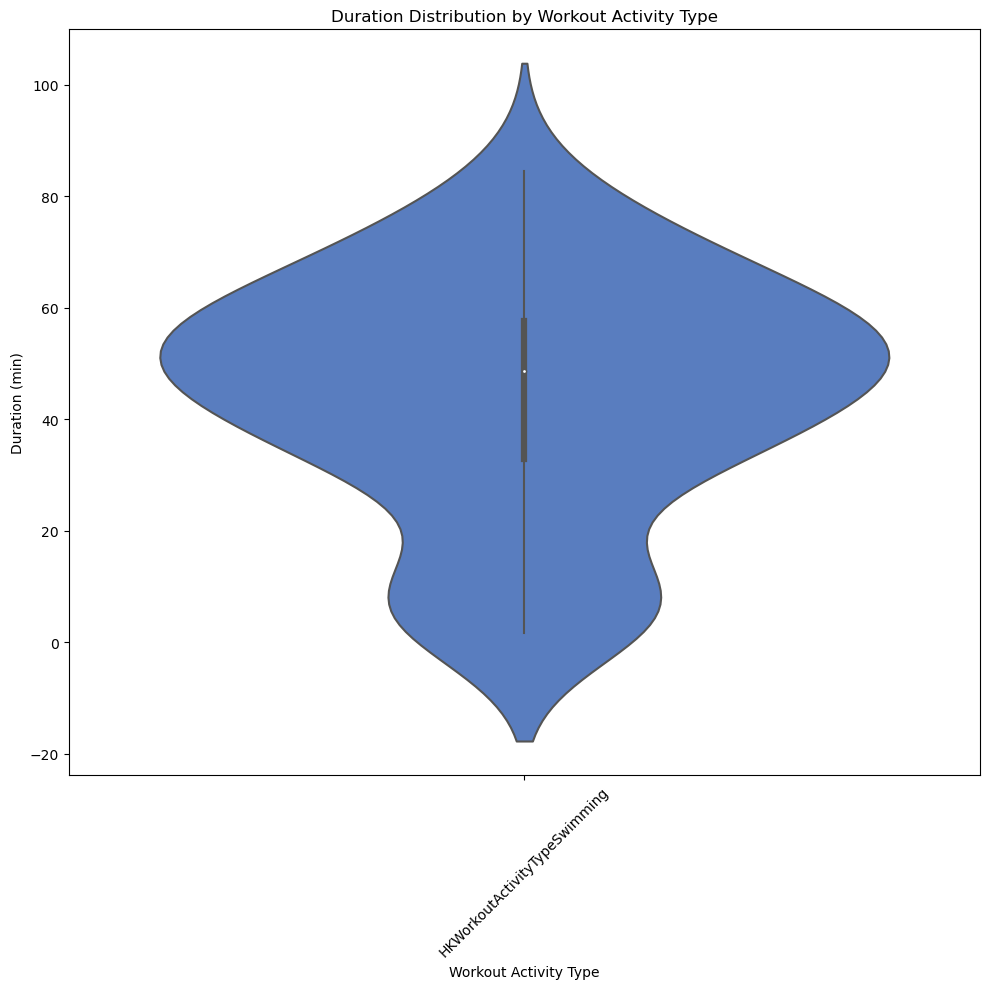

/var/folders/mz/9cypvzdn37g8034zbwdlq4g80000gn/T/ipykernel_6328/1228031057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['duration'] = pd.to_numeric(activity['duration'], errors='coerce')


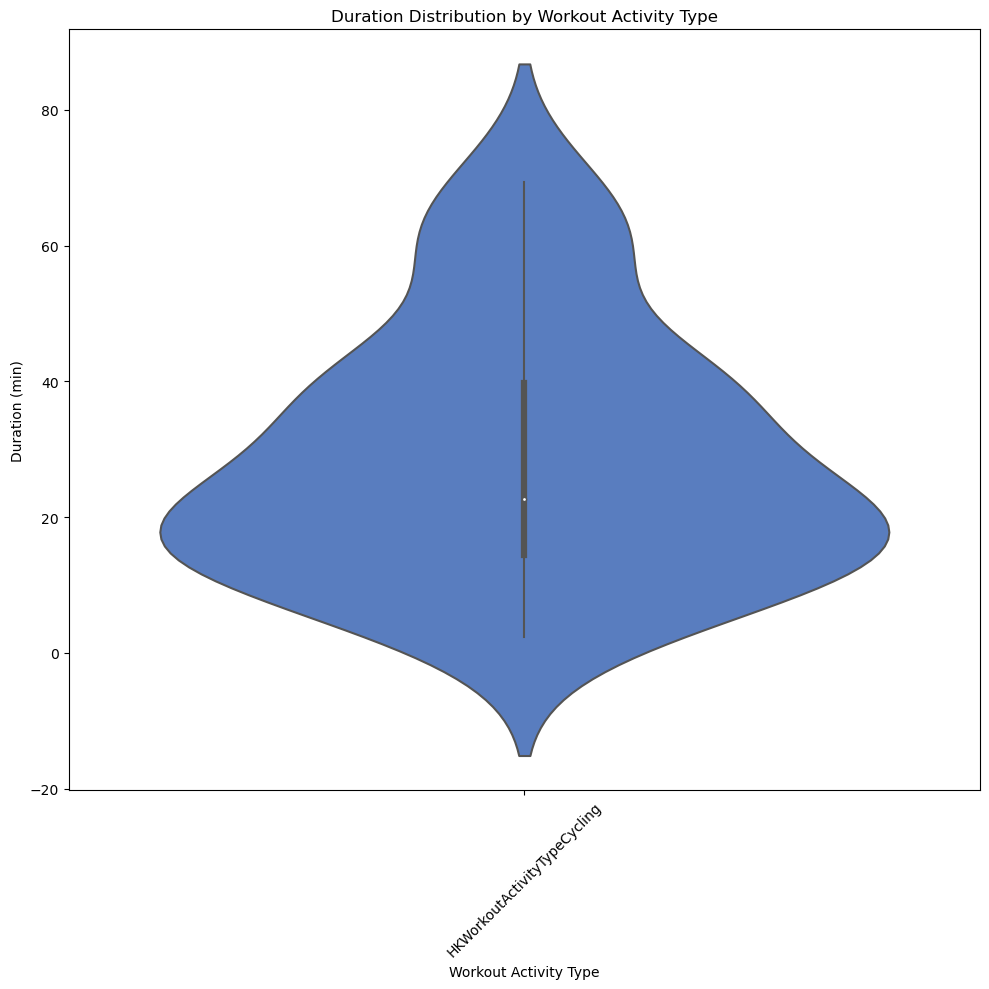

/var/folders/mz/9cypvzdn37g8034zbwdlq4g80000gn/T/ipykernel_6328/1228031057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['duration'] = pd.to_numeric(activity['duration'], errors='coerce')


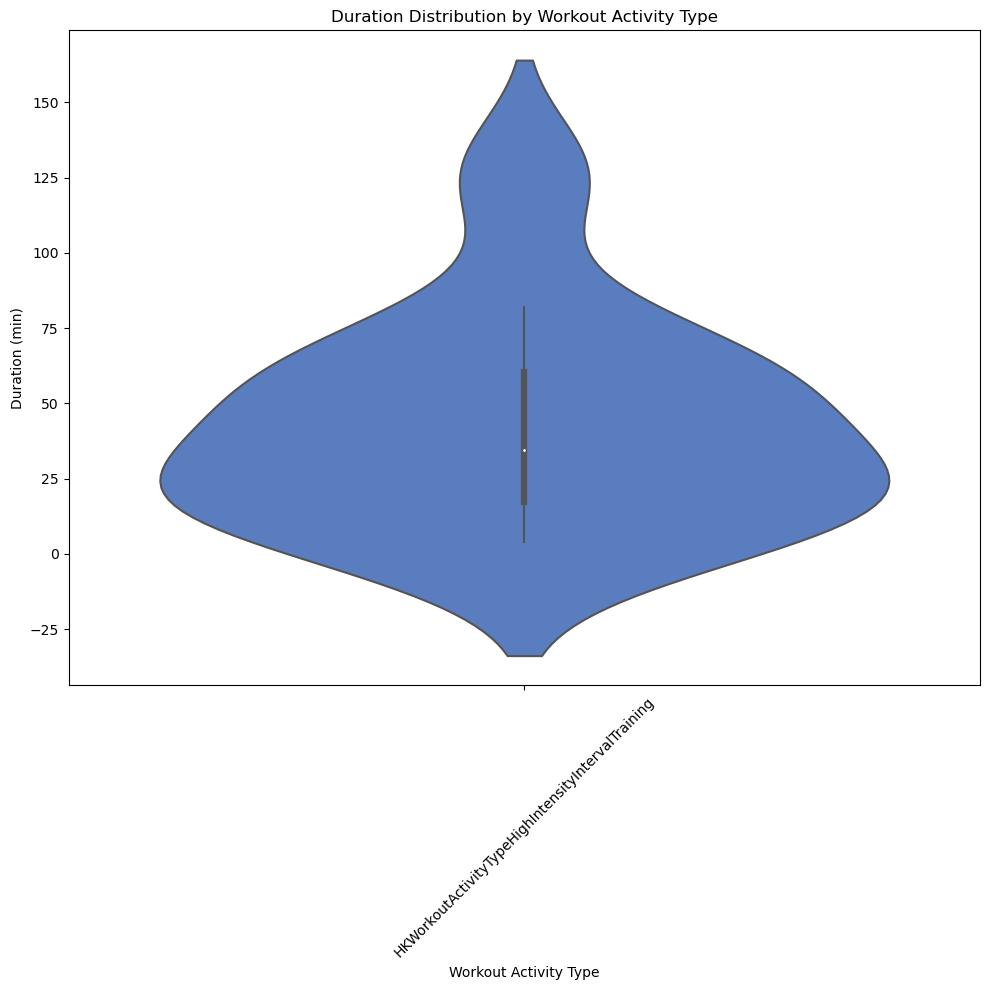

In [104]:
for x in listW:
    activity = Workouts2[Workouts2['workoutActivityType'] == x]
    # Ensure `duration` is numeric
    activity['duration'] = pd.to_numeric(activity['duration'], errors='coerce')

    # Drop rows where `duration` could not be converted to numeric
    activity= activity.dropna(subset=['duration'])
    plt.figure(figsize=(10, 10))
    sns.violinplot(data=activity, x="workoutActivityType", y="duration", palette="muted")
    plt.xticks(rotation=45)
    plt.title("Duration Distribution by Workout Activity Type")
    plt.xlabel("Workout Activity Type")
    plt.ylabel("Duration (min)")
    plt.tight_layout()
    plt.show()

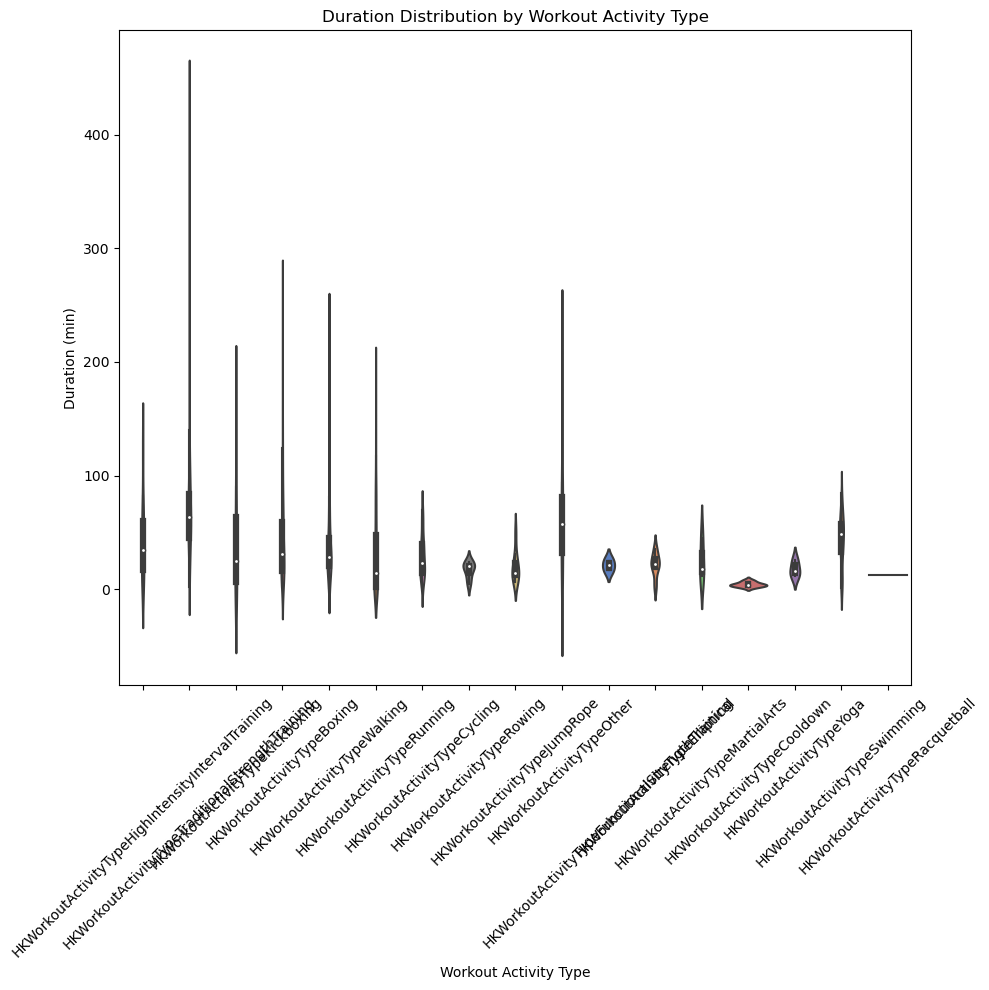

In [56]:
# Ensure `duration` is numeric
Workouts2['duration'] = pd.to_numeric(Workouts2['duration'], errors='coerce')

# Drop rows where `duration` could not be converted to numeric
Workouts2= Workouts2.dropna(subset=['duration'])
plt.figure(figsize=(10, 10))
sns.violinplot(data=Workouts2, x="workoutActivityType", y="duration", palette="muted")
plt.xticks(rotation=45)
plt.title("Duration Distribution by Workout Activity Type")
plt.xlabel("Workout Activity Type")
plt.ylabel("Duration (min)")
plt.tight_layout()
plt.show()

In [107]:
Workouts2

,workoutActivityType,duration,durationUnit,sourceName,sourceVersion,device,creationDate,startDate,endDate,cleanedActivityType
0,HKWorkoutActivityTypeHighIntensityIntervalTrai...,62.622253,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-08 22:05:15 -0600,2021-11-08 20:50:34 -0600,2021-11-08 22:05:14 -0600,HighIntensityInterval
1,HKWorkoutActivityTypeTraditionalStrengthTraining,46.994704,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:29:24 -0600,2021-11-09 20:42:11 -0600,2021-11-09 21:29:23 -0600,TraditionalStrength
2,HKWorkoutActivityTypeKickboxing,4.529790,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:33:59 -0600,2021-11-09 21:29:23 -0600,2021-11-09 21:33:58 -0600,Kickboxing
3,HKWorkoutActivityTypeHighIntensityIntervalTrai...,18.826380,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:52:48 -0600,2021-11-09 21:33:58 -0600,2021-11-09 21:52:48 -0600,HighIntensityInterval
4,HKWorkoutActivityTypeBoxing,3.499195,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:59:34 -0600,2021-11-09 21:56:04 -0600,2021-11-09 21:59:34 -0600,Boxing
...,...,...,...,...,...,...,...,...,...,...
918,HKWorkoutActivityTypeTraditionalStrengthTraining,95.216231,min,Isaac’s Apple Watch,10.6.1,"<<HKDevice: 0x300ca7570>, name:Apple Watch, ma...",2024-11-09 14:19:18 -0600,2024-11-09 12:43:53 -0600,2024-11-09 14:19:06 -0600,TraditionalStrength
919,HKWorkoutActivityTypeBoxing,13.433244,min,Isaac’s Apple Watch,10.6.1,"<<HKDevice: 0x300ca7570>, name:Apple Watch, ma...",2024-11-09 14:51:14 -0600,2024-11-09 14:37:36 -0600,2024-11-09 14:51:02 -0600,Boxing
920,HKWorkoutActivityTypeRunning,79.511019,min,Isaac’s Apple Watch,10.6.1,"<<HKDevice: 0x300ca7570>, name:Apple Watch, ma...",2024-11-10 09:54:03 -0600,2024-11-10 08:34:12 -0600,2024-11-10 09:53:42 -0600,Running
921,HKWorkoutActivityTypeTraditionalStrengthTraining,56.538336,min,Isaac’s Apple Watch,10.6.1,"<<HKDevice: 0x300ca7570>, name:Apple Watch, ma...",2024-11-11 21:32:07 -0600,2024-11-11 20:35:28 -0600,2024-11-11 21:32:01 -0600,TraditionalStrength


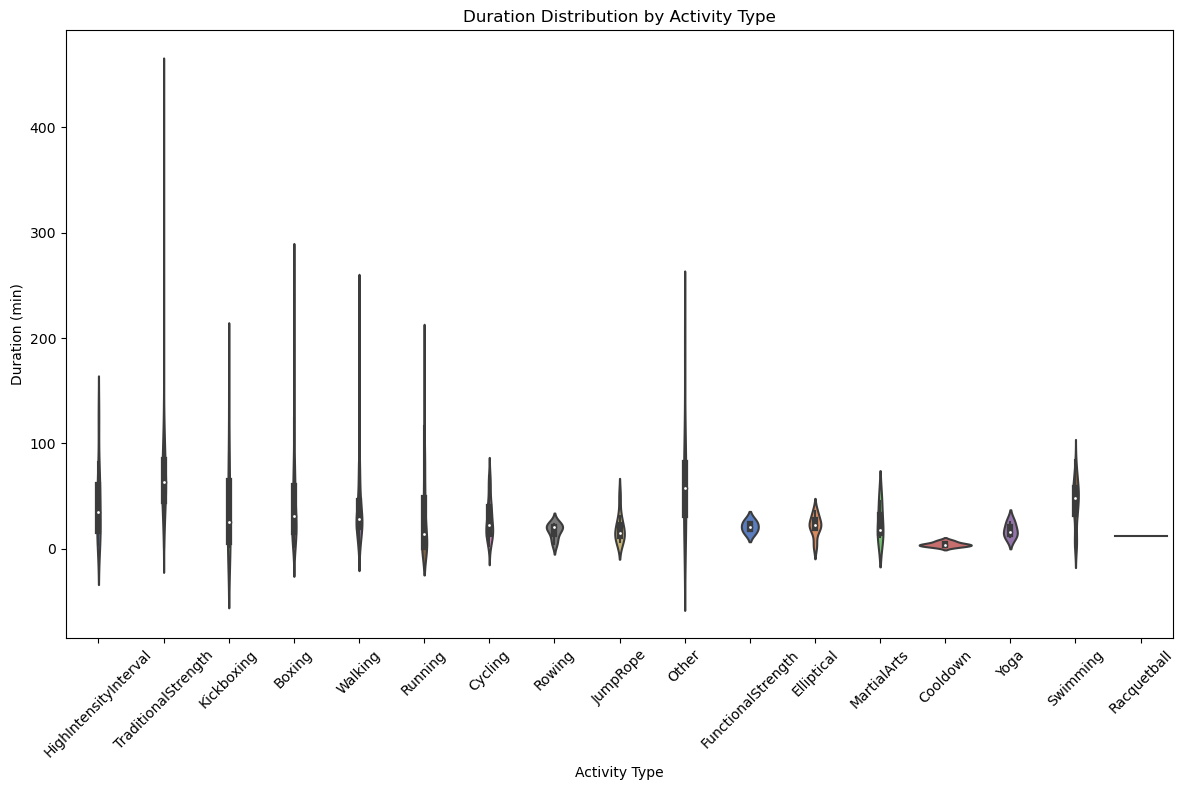

KeyError: 'startDate'

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your DataFrame containing the data

# 1. Clean the Names of Activity Types
def clean_activity_type(activity_type):
    return activity_type.replace("HKWorkoutActivityType", "").replace("Type", "").replace("Training", "").strip()

Workouts2['cleanedActivityType'] = Workouts2['workoutActivityType'].apply(clean_activity_type)

# 2. Plot the Duration Distribution for Each Activity Type
plt.figure(figsize=(12, 8))
sns.violinplot(data=Workouts2, x="cleanedActivityType", y="duration", palette="muted")
plt.xticks(rotation=45)
plt.title("Duration Distribution by Activity Type")
plt.xlabel("Activity Type")
plt.ylabel("Duration (min)")
plt.tight_layout()
plt.show()

# 3. Create a Timeline of Activities
# Convert dates to datetime format
df['startDate'] = pd.to_datetime(df['startDate'])
df['endDate'] = pd.to_datetime(df['endDate'])

# Create the timeline plot
plt.figure(figsize=(15, 6))
for i, activity in enumerate(df['cleanedActivityType'].unique()):
    activity_df = df[df['cleanedActivityType'] == activity]
    plt.scatter(activity_df['startDate'], [i] * len(activity_df), label=activity, alpha=0.7)

plt.yticks(range(len(df['cleanedActivityType'].unique())), df['cleanedActivityType'].unique())
plt.title("Activity Timeline")
plt.xlabel("Date")
plt.ylabel("Activity Type")
plt.legend(title="Activity Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [116]:
Workouts2['cleanedActivityType']

0      HighIntensityInterval
1        TraditionalStrength
2                 Kickboxing
3      HighIntensityInterval
4                     Boxing
               ...          
918      TraditionalStrength
919                   Boxing
920                  Running
921      TraditionalStrength
922      TraditionalStrength
Name: cleanedActivityType, Length: 923, dtype: object

In [118]:
pip install --upgrade pandas


Error processing line 3 of /Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/googleapis_common_protos-1.56.3-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 1.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-d

In [127]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
import numpy as np

# Ensure pandas correctly processes the datetime columns
Workouts2['startDate'] = pd.to_datetime(Workouts2['startDate'], errors='coerce')
Workouts2['endDate'] = pd.to_datetime(Workouts2['endDate'], errors='coerce')

# Ensure duration is numeric
Workouts2['duration'] = pd.to_numeric(Workouts2['duration'], errors='coerce')

# Drop rows with invalid dates or durations
Workouts2.dropna(subset=['startDate', 'endDate', 'duration'], inplace=True)

# 1. Get the Top 5 Activities with Most Entries
top_activities = Workouts2['cleanedActivityType'].value_counts().head(5).index
filtered_workouts = Workouts2[Workouts2['cleanedActivityType'].isin(top_activities)]

# 2. Plot Histograms with PDF for Each Activity
for activity in top_activities:
    activity_data = filtered_workouts[filtered_workouts['cleanedActivityType'] == activity]['duration']
    
    # Calculate PDF using gaussian_kde
    x = np.linspace(activity_data.min(), activity_data.max(), 1000)
    kde = gaussian_kde(activity_data)
    pdf = kde(x)

    # Create Histogram
    fig = px.histogram(activity_data, nbins=30, title=f"Duration Distribution with PDF for {activity}", opacity=0.75)
    
    # Add PDF line
    fig.add_trace(go.Scatter(
        x=x,
        y=pdf * len(activity_data) * (activity_data.max() - activity_data.min()) / 15,  # Scale PDF to histogram
        mode='lines',
        line=dict(color='red', width=2),
        name='PDF'
    ))
    
    # Update layout
    fig.update_layout(
        xaxis_title="Duration (minutes)",
        yaxis_title="Frequency",
        template="plotly_white"
    )
    fig.show()


In [128]:
Workouts2

,workoutActivityType,duration,durationUnit,sourceName,sourceVersion,device,creationDate,startDate,endDate,cleanedActivityType
0,HKWorkoutActivityTypeHighIntensityIntervalTrai...,62.622253,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-08 22:05:15 -0600,2021-11-08 20:50:34-06:00,2021-11-08 22:05:14-06:00,HighIntensityInterval
1,HKWorkoutActivityTypeTraditionalStrengthTraining,46.994704,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:29:24 -0600,2021-11-09 20:42:11-06:00,2021-11-09 21:29:23-06:00,TraditionalStrength
2,HKWorkoutActivityTypeKickboxing,4.529790,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:33:59 -0600,2021-11-09 21:29:23-06:00,2021-11-09 21:33:58-06:00,Kickboxing
3,HKWorkoutActivityTypeHighIntensityIntervalTrai...,18.826380,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:52:48 -0600,2021-11-09 21:33:58-06:00,2021-11-09 21:52:48-06:00,HighIntensityInterval
4,HKWorkoutActivityTypeBoxing,3.499195,min,Isaac’s Apple Watch,7.6.1,"<<HKDevice: 0x300cccb40>, name:Apple Watch, ma...",2021-11-09 21:59:34 -0600,2021-11-09 21:56:04-06:00,2021-11-09 21:59:34-06:00,Boxing
...,...,...,...,...,...,...,...,...,...,...
918,HKWorkoutActivityTypeTraditionalStrengthTraining,95.216231,min,Isaac’s Apple Watch,10.6.1,"<<HKDevice: 0x300ca7570>, name:Apple Watch, ma...",2024-11-09 14:19:18 -0600,2024-11-09 12:43:53-06:00,2024-11-09 14:19:06-06:00,TraditionalStrength
919,HKWorkoutActivityTypeBoxing,13.433244,min,Isaac’s Apple Watch,10.6.1,"<<HKDevice: 0x300ca7570>, name:Apple Watch, ma...",2024-11-09 14:51:14 -0600,2024-11-09 14:37:36-06:00,2024-11-09 14:51:02-06:00,Boxing
920,HKWorkoutActivityTypeRunning,79.511019,min,Isaac’s Apple Watch,10.6.1,"<<HKDevice: 0x300ca7570>, name:Apple Watch, ma...",2024-11-10 09:54:03 -0600,2024-11-10 08:34:12-06:00,2024-11-10 09:53:42-06:00,Running
921,HKWorkoutActivityTypeTraditionalStrengthTraining,56.538336,min,Isaac’s Apple Watch,10.6.1,"<<HKDevice: 0x300ca7570>, name:Apple Watch, ma...",2024-11-11 21:32:07 -0600,2024-11-11 20:35:28-06:00,2024-11-11 21:32:01-06:00,TraditionalStrength


In [129]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Ensure pandas correctly processes the datetime columns
Workouts2['startDate'] = pd.to_datetime(Workouts2['startDate'], errors='coerce')
Workouts2['endDate'] = pd.to_datetime(Workouts2['endDate'], errors='coerce')

# Filter for the top 5 activities based on entries
top_activities = Workouts2['cleanedActivityType'].value_counts().head(5).index
filtered_workouts = Workouts2[Workouts2['cleanedActivityType'].isin(top_activities)]

# Create a color palette for the top activities
colors = px.colors.qualitative.Plotly
activity_colors = {activity: colors[i % len(colors)] for i, activity in enumerate(top_activities)}

# Build the timeline
fig = go.Figure()

for activity in top_activities:
    activity_df = filtered_workouts[filtered_workouts['cleanedActivityType'] == activity]
    fig.add_trace(go.Scatter(
        x=activity_df['startDate'],
        y=[activity] * len(activity_df),  # Position the activities on the y-axis
        mode='markers',
        marker=dict(color=activity_colors[activity], size=8),
        name=activity
    ))

# Customize layout
fig.update_layout(
    title="Workout Timeline for Top 5 Activities",
    xaxis_title="Date",
    yaxis=dict(
        title="Activity Type",
        tickvals=top_activities,
        ticktext=top_activities
    ),
    template="plotly_white",
    height=600,
    showlegend=True
)

fig.show()


/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [130]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Ensure pandas correctly processes the datetime columns
Workouts2['startDate'] = pd.to_datetime(Workouts2['startDate'], errors='coerce')
Workouts2['duration'] = pd.to_numeric(Workouts2['duration'], errors='coerce')

# Filter for the top 5 activities based on entries
top_activities = Workouts2['cleanedActivityType'].value_counts().head(5).index
filtered_workouts = Workouts2[Workouts2['cleanedActivityType'].isin(top_activities)]

# Sort by date to calculate cumulative duration
filtered_workouts = filtered_workouts.sort_values(by='startDate')

# Create a cumulative sum for each activity
filtered_workouts['cumulativeDuration'] = filtered_workouts.groupby('cleanedActivityType')['duration'].cumsum()

# Create a color palette for the top activities
colors = px.colors.qualitative.Plotly
activity_colors = {activity: colors[i % len(colors)] for i, activity in enumerate(top_activities)}

# Build the timeline
fig = go.Figure()

for activity in top_activities:
    activity_df = filtered_workouts[filtered_workouts['cleanedActivityType'] == activity]
    fig.add_trace(go.Scatter(
        x=activity_df['startDate'],
        y=activity_df['cumulativeDuration'],
        mode='lines+markers',
        marker=dict(color=activity_colors[activity], size=6),
        line=dict(color=activity_colors[activity], width=2),
        name=activity
    ))

# Customize layout
fig.update_layout(
    title="Cumulative Workout Duration Timeline for Top 5 Activities",
    xaxis_title="Date",
    yaxis_title="Cumulative Duration (minutes)",
    template="plotly_white",
    height=600,
    showlegend=True
)

fig.show()


/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [131]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Ensure pandas correctly processes the datetime columns
Workouts2['startDate'] = pd.to_datetime(Workouts2['startDate'], errors='coerce')
Workouts2['duration'] = pd.to_numeric(Workouts2['duration'], errors='coerce')

# Filter for the top 5 activities based on entries
top_activities = Workouts2['cleanedActivityType'].value_counts().head(5).index
filtered_workouts = Workouts2[Workouts2['cleanedActivityType'].isin(top_activities)]

# Create a color palette for the top activities
colors = px.colors.qualitative.Plotly
activity_colors = {activity: colors[i % len(colors)] for i, activity in enumerate(top_activities)}

# Build the timeline
fig = go.Figure()

for activity in top_activities:
    activity_df = filtered_workouts[filtered_workouts['cleanedActivityType'] == activity]
    fig.add_trace(go.Scatter(
        x=activity_df['startDate'],
        y=activity_df['duration'],
        mode='markers',
        marker=dict(color=activity_colors[activity], size=8),
        name=activity
    ))

# Customize layout
fig.update_layout(
    title="Workout Timeline for Top 5 Activities (Duration as Y-Axis)",
    xaxis_title="Date",
    yaxis_title="Duration (minutes)",
    template="plotly_white",
    height=600,
    showlegend=True
)

fig.show()


/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [132]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Ensure pandas correctly processes the datetime columns
Workouts2['startDate'] = pd.to_datetime(Workouts2['startDate'], errors='coerce')
Workouts2['duration'] = pd.to_numeric(Workouts2['duration'], errors='coerce')

# Filter for the top 5 activities based on entries
top_activities = Workouts2['cleanedActivityType'].value_counts().head(5).index
filtered_workouts = Workouts2[Workouts2['cleanedActivityType'].isin(top_activities)]

# Create a color palette for the top activities
colors = px.colors.qualitative.Plotly
activity_colors = {activity: colors[i % len(colors)] for i, activity in enumerate(top_activities)}

# Build the timeline with lines
fig = go.Figure()

for activity in top_activities:
    activity_df = filtered_workouts[filtered_workouts['cleanedActivityType'] == activity]
    fig.add_trace(go.Scatter(
        x=activity_df['startDate'],
        y=activity_df['duration'],
        mode='lines+markers',
        marker=dict(color=activity_colors[activity], size=8),
        line=dict(color=activity_colors[activity], width=2),
        name=activity
    ))

# Customize layout
fig.update_layout(
    title="Workout Timeline for Top 5 Activities (Duration as Y-Axis with Lines)",
    xaxis_title="Date",
    yaxis_title="Duration (minutes)",
    template="plotly_white",
    height=600,
    showlegend=True
)

fig.show()


/Users/isaacfernandez/opt/anaconda3/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [135]:
import pandas as pd
import plotly.express as px

# Ensure `startDate` is in datetime format
Workouts2['startDate'] = pd.to_datetime(Workouts2['startDate'], errors='coerce')

# Extract the hour from `startDate`
Workouts2['hour'] = Workouts2['startDate'].dt.hour

# Create a histogram for workout hours
fig = px.histogram(
    Workouts2, 
    x='hour', 
    nbins=24, 
    title='Distribution of Workouts by Hour of the Day',
    labels={'hour': 'Hour of the Day'},
    template='plotly_white'
)

# Customize layout
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(24)),  # Show all 24 hours on the x-axis
        title='Hour of the Day'
    ),
    yaxis_title='Frequency'
)

fig.show()


In [136]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

# Ensure `startDate` is in datetime format
Workouts2['startDate'] = pd.to_datetime(Workouts2['startDate'], errors='coerce')

# Extract the hour from `startDate`
Workouts2['hour'] = Workouts2['startDate'].dt.hour

# Create histogram for workout hours
fig = go.Figure()

# Add histogram
fig.add_trace(go.Histogram(
    x=Workouts2['hour'],
    nbinsx=24,
    name='Histogram',
    marker=dict(color='lightblue', line=dict(color='darkblue', width=1)),
    opacity=0.7
))

# Compute KDE for distribution line
kde = gaussian_kde(Workouts2['hour'])
x_vals = np.linspace(0, 23, 500)  # Generate smooth x values for 24 hours
y_vals = kde(x_vals) * len(Workouts2['hour']) * (23 / 24)  # Scale KDE to match histogram

# Add distribution line
fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Density Curve',
    line=dict(color='red', width=2)
))

# Customize layout
fig.update_layout(
    title='Distribution of Workouts by Hour of the Day (With Density Curve)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(24)),  # Show all 24 hours on the x-axis
        title='Hour of the Day'
    ),
    yaxis_title='Frequency',
    template='plotly_white',
    height=600
)

fig.show()
